# Load the relabeled calsses, pcs and v_exp of the climo data

In [1]:
import xarray as xr
import numpy as np

data_dir = 'D:/VScode/Last_deglaciation/climo_ana_data'
ds_sat = xr.open_dataset(data_dir + '/ds_GMM_climo_relabeled.nc')

# load pcs_climo.pkl
import pickle
with open(data_dir + '/pcs_climo.pkl', 'rb') as f:
    PCs= pickle.load(f)

# load exp_v_climo.pkl
with open(data_dir + '/exp_v_climo.pkl', 'rb') as f:
    variance_explained = pickle.load(f)

# load eofs_climo.pkl
with open(data_dir + '/eofs_climo.pkl', 'rb') as f:
    EOFs = pickle.load(f)


In [10]:
ds_sat

<xarray.Dataset>
Dimensions:                (age: 65, lat: 96, lon: 144)
Coordinates:
  * lat                    (lat) float32 -90.0 -88.11 -86.21 ... 88.11 90.0
  * lon                    (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * age                    (age) float32 1.11e+04 1.13e+04 ... 2.37e+04 2.39e+04
Data variables:
    sat                    (age, lat, lon) float32 ...
    sat_std                (age, lat, lon) float32 ...
    sat_centered           (age, lat, lon) float32 ...
    weight                 (lat) float32 ...
    sat_centered_weighted  (age, lat, lon) float32 ...
    class_label            (lat, lon) int64 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    class_relabeled        (lat, lon) int32 ...

# Load the data generated from the ensemble data

In [2]:
# read the aic_values_dict
import pickle
with open('ens_ana_data/aic_values_dict.pkl', 'rb') as f:
    aic_values_dict = pickle.load(f)

# Load the ens pcs from path /ens_ana_data/
import pickle
pcs_ens = pickle.load(open('ens_ana_data/pcs.p', 'rb'))

# correct the sign of the ens pcs
from scipy import stats
for i in range(len(pcs_ens)):
    slope, intercept, r_value, p_value, std_err = stats.linregress(pcs_ens[i][:,1], PCs[:,1])
    
    if slope<0:
        pcs_ens[i][:,1]=pcs_ens[i][:,1]*-1



In [3]:
pc1_ens=np.zeros((len(pcs_ens[0][:,0]),len(pcs_ens)))
pc2_ens=np.zeros((len(pcs_ens[0][:,0]),len(pcs_ens)))

for i in range(len(pcs_ens)):
    pc1_ens[:,i]=pcs_ens[i][:,0]
    pc2_ens[:,i]=pcs_ens[i][:,1]

pc1_ens_5th=np.percentile(pc1_ens,5,axis=1)
pc1_ens_25th=np.percentile(pc1_ens,25,axis=1)
pc1_ens_75th=np.percentile(pc1_ens,75,axis=1)
pc1_ens_95th=np.percentile(pc1_ens,95,axis=1)
pc1_ens_median=np.median(pc1_ens,axis=1)

pc2_ens_5th=np.percentile(pc2_ens,5,axis=1)
pc2_ens_25th=np.percentile(pc2_ens,25,axis=1)
pc2_ens_75th=np.percentile(pc2_ens,75,axis=1)
pc2_ens_95th=np.percentile(pc2_ens,95,axis=1)
pc2_ens_median=np.median(pc2_ens,axis=1)

Text(0.5, 0, 'Class Label')

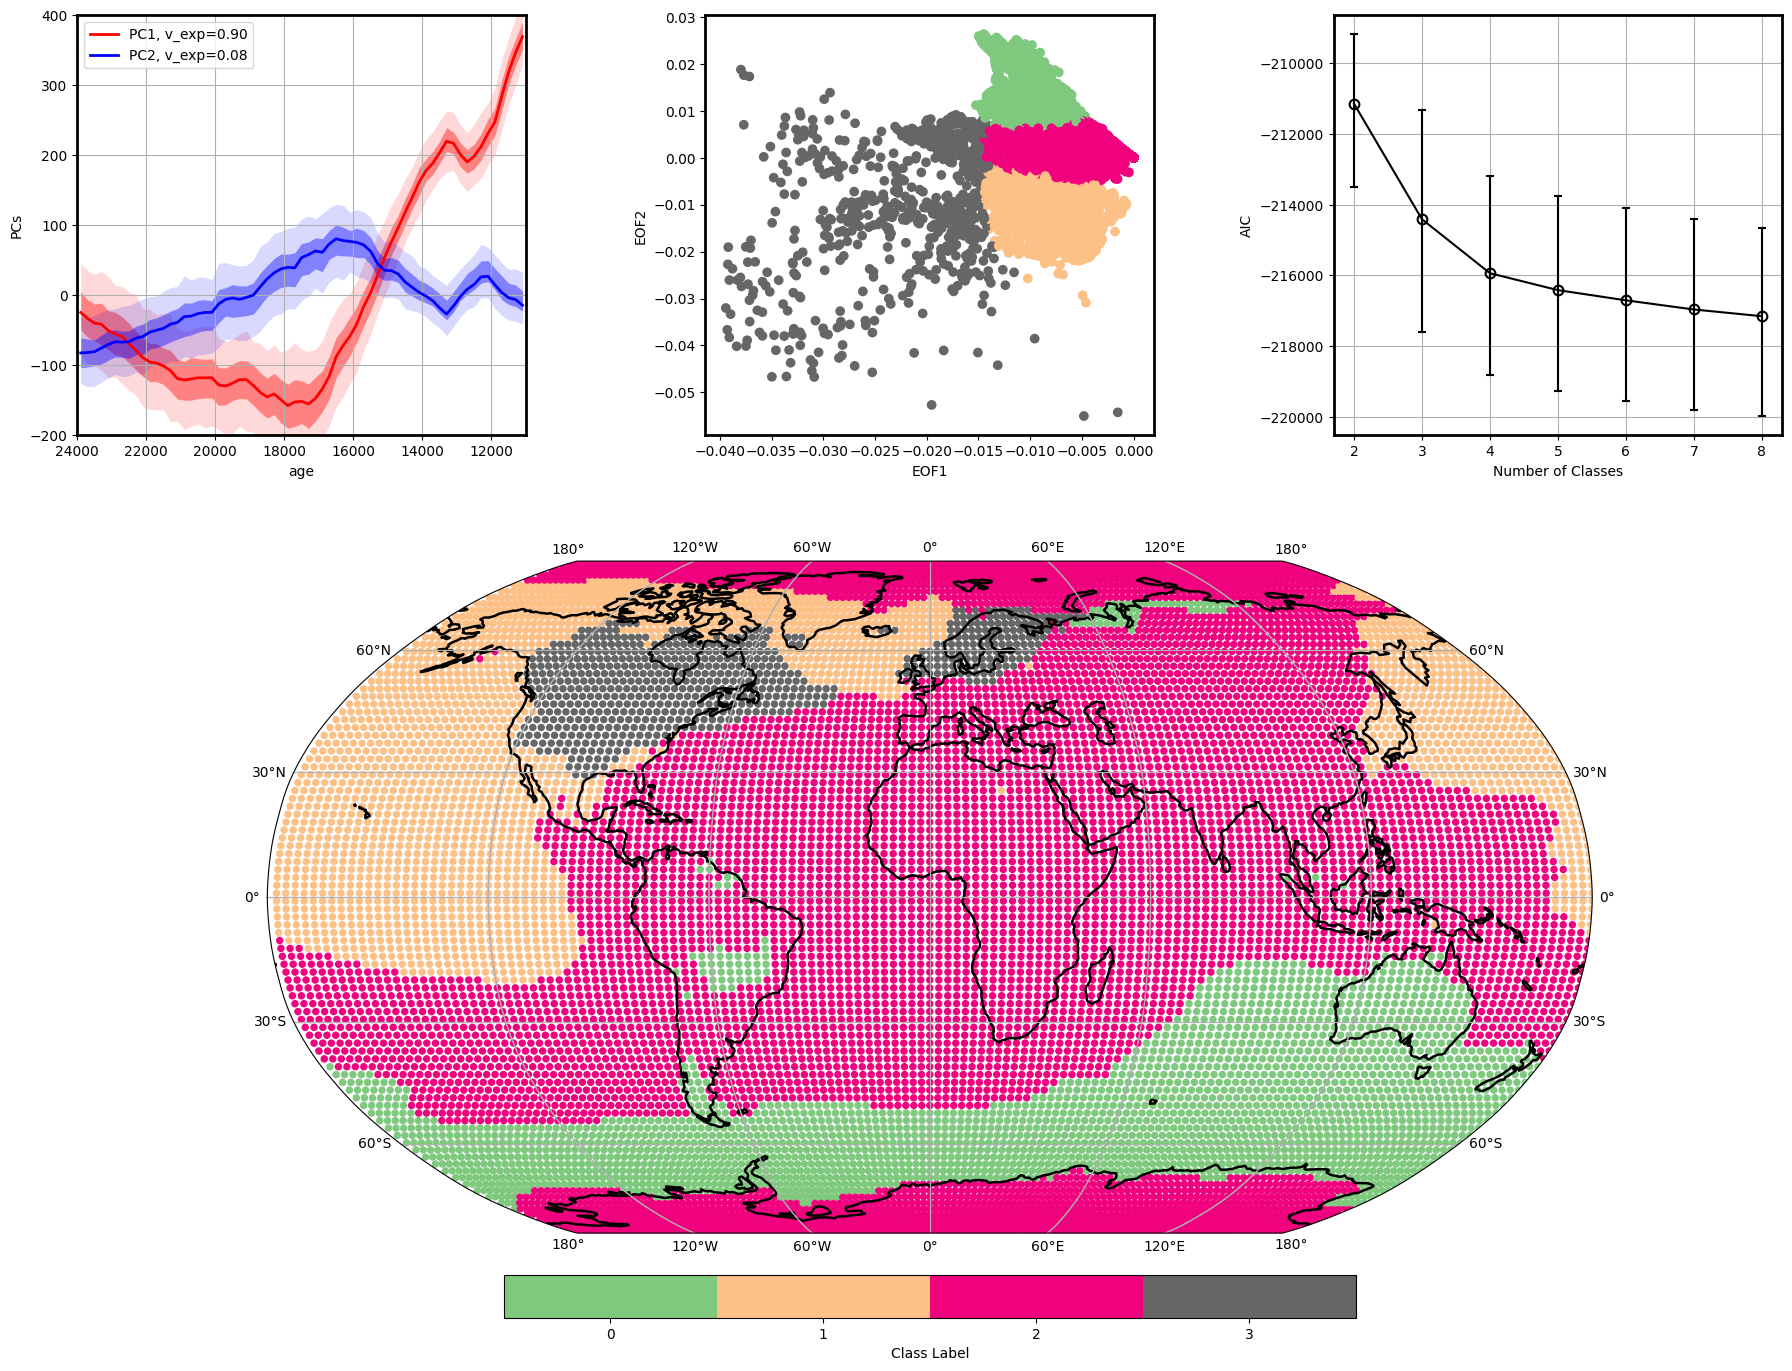

In [9]:

# plot the PCs against the age
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
from scipy.stats import zscore


fig = plt.figure(figsize=(22, 18))
spec = fig.add_gridspec(nrows=2, ncols=3, height_ratios=[1, 2],wspace=0.4)

# Create your subplots
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[0, 2])
ax4 = fig.add_subplot(spec[1, :], projection=ccrs.Robinson())  # Spans all columns of the second row





    
# for i in range(len(pcs_ens)):
#     ax1.plot(ds_sat['age'], (pcs_ens[i][:,0]),color=[1,0.7,0.7],linewidth=1)

# for i in range(len(pcs_ens)):
#     ax1.plot(ds_sat['age'], (pcs_ens[i][:,1]),color=[0.7,0.7,1],linewidth=1)
# fill the area between the 5th and 95th quantile of the pc1 using red with alpha=0.15
ax1.fill_between(ds_sat['age'], pc1_ens_5th, pc1_ens_95th, color='r', alpha=.15,linewidth=0)
# fill the area between the 25th and 75th quantile of the pc1 using red with alpha=0.4
ax1.fill_between(ds_sat['age'], pc1_ens_25th, pc1_ens_75th, color='r', alpha=.4,linewidth=0)

# fill the area between the 5th and 95th quantile of the pc2 using blue with alpha=0.15
ax1.fill_between(ds_sat['age'], pc2_ens_5th, pc2_ens_95th, color='b', alpha=.15,linewidth=0)
# fill the area between the 25th and 75th quantile of the pc2 using blue with alpha=0.4
ax1.fill_between(ds_sat['age'], pc2_ens_25th, pc2_ens_75th, color='b', alpha=.4,linewidth=0)


ax1.plot(ds_sat['age'], (-1*PCs[:, 0]), color='r',linewidth=2,markerfacecolor='white', label='PC1, v_exp={:.2f}'.format(variance_explained[0]))
ax1.plot(ds_sat['age'], (PCs[:, 1]), color='b',linewidth=2,markerfacecolor='white', label='PC2, v_exp={:.2f}'.format(variance_explained[1]))
# plot the 5th quantile of the ens pcs
# ax1.plot(ds_sat['age'], pc1_ens_5th, color='r',linewidth=2,markerfacecolor='white', label='PC1, v_exp={:.2f}'.format(variance_explained[0]))

# ax1.plot(ds_sat['age'], -1*PCs[:, 0], color='r',linewidth=2,marker='o',markerfacecolor='white', label='PC1, v_exp={:.2f}'.format(variance_explained[0]))
# ax1.plot(ds_sat['age'], PCs[:, 1], color='b',linewidth=2,marker='o',markerfacecolor='white', label='PC2, v_exp={:.2f}'.format(variance_explained[1]))

# set line width of the box
for axis in ['top','bottom','left','right']:
    ax1.spines[axis].set_linewidth(2)
# set xlim
ax1.set_xlim(11000, 24000)
# set ylim
ax1.set_ylim(-200, 400)

# reverse the x-axis
ax1.invert_xaxis()

ax1.set_xlabel('age')
ax1.set_ylabel('PCs')
ax1.legend()
ax1.grid(True)







# colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
# cmap = mcolors.ListedColormap(colors[0:len(np.unique(ds_sat['class_relabeled']))])
unique_labels = np.unique(ds_sat['class_relabeled'])
cmap = plt.get_cmap('Accent', len(unique_labels))

scatter = ax2.scatter(EOFs[:,0], EOFs[:,1], c=ds_sat['class_relabeled'], cmap=cmap)
# axes[1, 0].set_title("EOF1 vs EOF2")
ax2.set_xlabel("EOF1")
ax2.set_ylabel("EOF2")
# set line width of the box
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(2)
    



n_components_range = range(2, 9)  # 2 to 8 inclusive
# Compute means, lower and upper limits
median = [np.median(aic_values_dict[key]) for key in n_components_range]
lower_limits = [np.percentile(aic_values_dict[key], 5) for key in n_components_range]
upper_limits = [np.percentile(aic_values_dict[key], 95) for key in n_components_range]

# Differences from the mean for error bars
lower_errors = [mean - lower for mean, lower in zip(median, lower_limits)]
upper_errors = [upper - mean for mean, upper in zip(median, upper_limits)]

# AIC Plot
# ax2.errorbar(n_components_range, means, yerr=[lower_errors, upper_errors], 
#                capsize=5, fmt='-o', label='Mean AIC with 5% and 95% quantiles of AIC')
# AIC Plot
line, caplines, barlinecols = ax3.errorbar(n_components_range, median, 
               yerr=[lower_errors, upper_errors], capsize=3, color='black',
               fmt='-o', markerfacecolor='none', markersize=7,markeredgewidth=1.5, label='Mean AIC with 5% and 95% quantiles of AIC')  # add markerfacecolor='none'

ax3.set_xlabel('Number of Classes')
ax3.set_ylabel('AIC')
# ax2.legend()
ax3.grid(True)
# set line width of the box
for axis in ['top','bottom','left','right']:
    ax3.spines[axis].set_linewidth(2)






sat_label = ds_sat['class_relabeled']

# colors = [
#     (0.42, 0.67, 0.84),  # Soft blue
#     (0.95, 0.89, 0.6),   # Mellow yellow
#     (0.5, 0.76, 0.56),   # Soothing green
#     (1,1,1)              # White
# ]

ax4.add_feature(cfeature.COASTLINE, linewidth=1.8, edgecolor='black')
ax4.gridlines()
# ax4.add_feature(cfeature.BORDERS, linewidth=1.5, edgecolor='black')

# Generating meshgrid for lon-lat
lon, lat = np.meshgrid(ds_sat.lon, ds_sat.lat)

# Flattening the lon-lat and the label data for scatter plotting
lon_flat = lon.flatten()
lat_flat = lat.flatten()
labels_flat = sat_label.values.flatten()

# # Using a scatter plot instead of pcolormesh
sc = ax4.scatter(lon_flat, lat_flat, c=labels_flat, cmap=cmap, transform=ccrs.PlateCarree(), alpha=1, s=19)  # s is the size of the scatter point
# plot heatmap with Robinson projection
# im = sat_label.plot(ax=ax4, transform=ccrs.PlateCarree(), cmap=cmap, shading='auto', add_colorbar=False)

gl = ax4.gridlines(draw_labels=True)

ax4.set_xlabel('Longitude')
ax4.set_ylabel('Latitude')

bounds = np.arange(len(np.unique(sat_label))+1) - 0.5
ticks = np.arange(len(np.unique(sat_label)))
cbar = fig.colorbar(sc, ax=ax4, orientation='horizontal', pad=0.05, boundaries=bounds, ticks=ticks, shrink=0.5)
cbar.ax.set_xlabel('Class Label')


In [8]:
# print colors in cmap
for i in range(len(colors)):
    print(i, cmap(i))


0 (0.4980392156862745, 0.788235294117647, 0.4980392156862745, 1.0)
1 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314, 1.0)
2 (0.9411764705882353, 0.00784313725490196, 0.4980392156862745, 1.0)
3 (0.4, 0.4, 0.4, 1.0)


In [11]:
cmap=[(0.4980392156862745, 0.788235294117647, 0.4980392156862745),(0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
      (0.9411764705882353, 0.00784313725490196, 0.4980392156862745),(0.4, 0.4, 0.4)
      ]

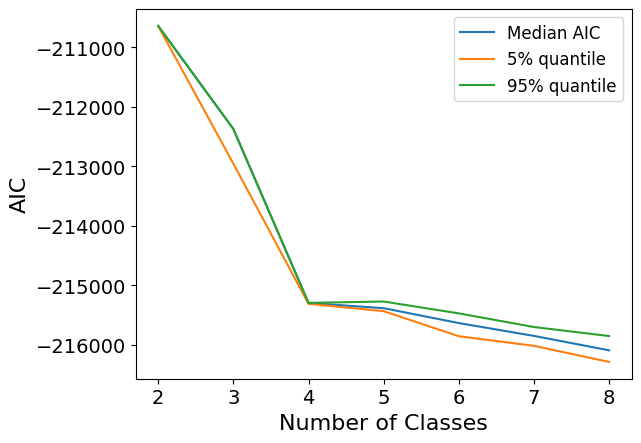

In [41]:
# plot median, lower_limits and upper_limits of AIC in a new plot
fig, ax = plt.subplots()
ax.plot(n_components_range, median, label='Median AIC')
ax.plot(n_components_range, lower_limits, label='5% quantile')
ax.plot(n_components_range, upper_limits, label='95% quantile')
ax.set_xlabel('Number of Classes')
ax.set_ylabel('AIC')
ax.legend()